In [17]:
import pandas as pd

In [ ]:
dataset=pd.read_csv('heart.csv')
dataset.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [20]:
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [21]:
dataset['target'].value_counts()


target
1    526
0    499
Name: count, dtype: int64

In [27]:
x= dataset.drop(columns=['target'])
y= dataset['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify=y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

In [28]:
print(x_train.head())
print(y_train.head())

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
4     62    0   0       138   294    1        1      106      0      1.9   
688   56    0   0       200   288    1        0      133      1      4.0   
477   57    1   2       128   229    0        0      150      0      0.4   
336   57    1   2       150   126    1        1      173      0      0.2   
960   52    0   2       136   196    0        0      169      0      0.1   

     slope  ca  thal  
4        1   3     2  
688      0   2     3  
477      1   1     3  
336      2   1     3  
960      1   0     2  
4      0
688    0
477    0
336    1
960    1
Name: target, dtype: int64


In [29]:
model = LogisticRegression()
model.fit(x_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8512195121951219


In [31]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8341463414634146


In [34]:
import numpy as np
input_data =np.array([63, 1, 3, 145, 233, 1, 0, 150, 0.0, 2.3, 0, 0, 1])
input_data = input_data.reshape(1, -1)
prediction = model.predict(input_data)
if prediction[0] == 0:
    print("The person does not have heart disease")
else:
    print("The person has heart disease")


The person has heart disease


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[[74 26]
 [ 8 97]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       100
           1       0.79      0.92      0.85       105

    accuracy                           0.83       205
   macro avg       0.85      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



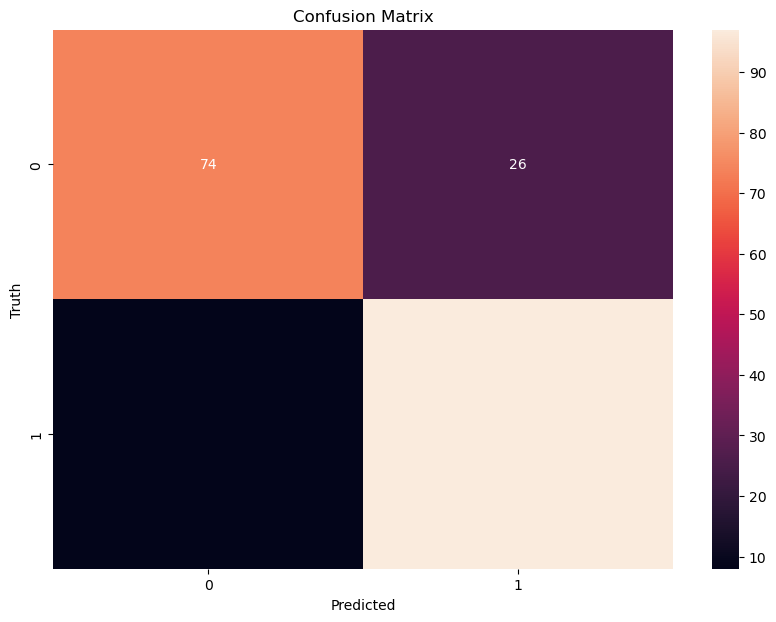

In [35]:
confusion_matrix = confusion_matrix(y_test, x_test_prediction)
print(confusion_matrix)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
print(classification_report(y_test, x_test_prediction))